# qBounce with generalized boundary condition

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import airy, ai_zeros
from scipy.optimize import root
from scipy.constants import hbar, m_n
from scipy.interpolate import UnivariateSpline

# constants

In [2]:
g = 9.8049165 # from falling corner cube measurement 

ν_16 = 972.81 # Hz
Δν_16 = 0.0012 # Hz

ν_27 = 865.821 # Hz
Δν_27 = 0.0005 # Hz

x0 = (hbar ** 2 / (2 * m_n ** 2 * g) ) ** (1. / 3)

Tabulate $\zeta_n(\lambda)$ for a range of $\lambda$s

In [3]:
def root_f(ζ, λ):
    ai, diff_ai, _, _ = airy(ζ)
    return ai - λ * diff_ai

def range_ζ(n, 𝜆_max, N):
    
    λ = np.linspace(0, 𝜆_max, N)
    ζ = np.zeros(N)

    ζ[0] = ai_zeros(n)[0][-1]

    for k in range(1, N):
        sol = root(lambda _ : root_f(_, λ[k]), ζ[k - 1])
        
        ζ[k] = sol.x if sol.success else np.nan
            
    return λ, ζ

In [4]:
λ_data, ζ1 = range_ζ(1, 0.2, 10000)
λ_data, ζ6 = range_ζ(6, 0.2, 10000)


χ2_16_data = (
    (2 * np.pi * hbar * ν_16 + m_n * g * x0 * (ζ6 - ζ1)) / (2 * np.pi * hbar * Δν_16)
) ** 2


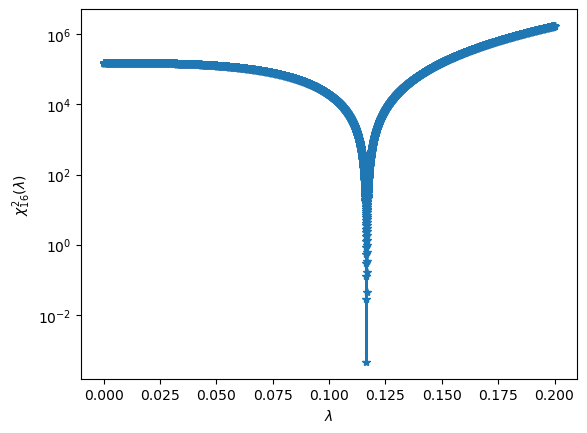

In [5]:
plt.semilogy(λ_data, χ2_16_data, '-*')
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\chi_{16}^2(\lambda)$")
plt.show()

## Intorpolation of $\chi^2$

In [6]:
χ2_16 = UnivariateSpline(λ_data, χ2_16_data, s=0, k=4, ext=2)

In [7]:
np.allclose(χ2_16(λ_data), χ2_16_data)

True

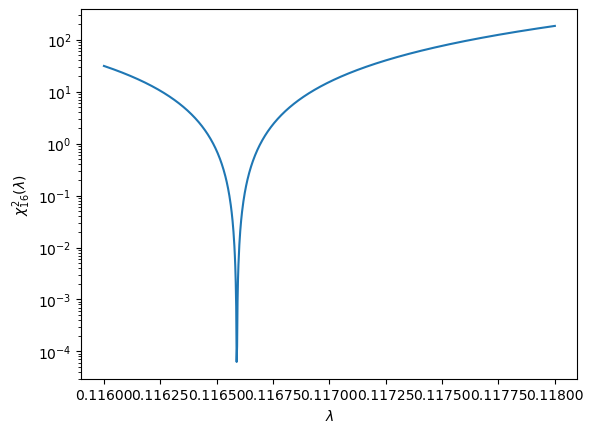

In [15]:
λ = np.linspace(0.116, 0.118, 1000)

plt.semilogy(λ, χ2_16(λ), '-')
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\chi_{16}^2(\lambda)$")
plt.show()

## Extracting $\lambda$ and its error

In [9]:
λ0 = χ2_16.derivative().roots()[0]
λ0 

0.11658941866155896

Assuming 99% confidence

In [10]:
Δλ0 = np.diff(
    UnivariateSpline(λ_data, χ2_16_data - (χ2_16(λ0) + 6.63), s=0, k=3, ext=2).roots()
)[0] / 2 

Δλ0 

0.0002698822968983314

# Get the energy of $2\to 7$ transition

In [11]:
λ_data, ζ2 = range_ζ(2, λ0  + Δλ0, 10000)
λ_data, ζ7 = range_ζ(7, λ0  + Δλ0, 10000)

ν_27_theory_data = -m_n * g * x0 * (ζ7 - ζ2) / (2 * np.pi * hbar)
ν_27_theory = UnivariateSpline(λ_data, ν_27_theory_data, s=0, k=3, ext=2)


χ2_27_data = (
    (2 * np.pi * hbar * ν_27 + m_n * g * x0 * (ζ7 - ζ2)) / (2 * np.pi * hbar * Δν_27)
) ** 2

χ2_27 = UnivariateSpline(λ_data, χ2_27_data, s=0, k=4, ext=2)

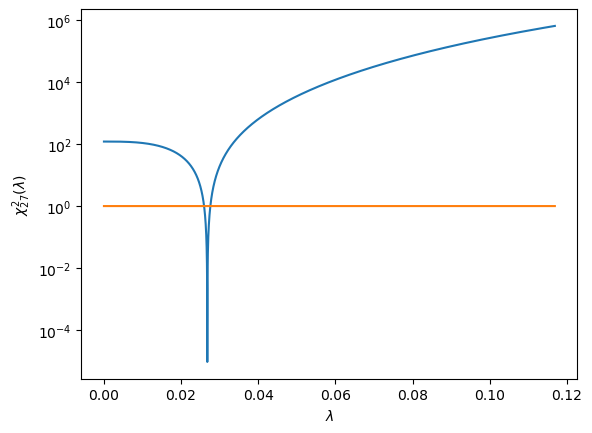

In [12]:
plt.semilogy(λ_data, χ2_27_data)
plt.semilogy(λ_data, np.ones_like(λ_data))
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$\chi_{27}^2(\lambda)$")
plt.show()

In [13]:
ν_27_theory(λ0  - Δλ0), ν_27_theory(λ0  + Δλ0)

(array(866.22336244), array(866.22867531))

In [14]:
ν_27

865.821